## Comparing classification Models

+ Creat a dummy dataset 

In [2]:
from sklearn.datasets import make_classification

In [7]:
X,y = make_classification(n_samples=1000, n_classes=2, n_features=5, random_state=42)

In [8]:
X.shape

(1000, 5)

In [5]:
y.shape

(1000,)

+ Split the data 8:2

In [9]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
Xtrain.shape,ytrain.shape

((800, 5), (800,))

In [12]:
Xtest.shape,ytest.shape

((200, 5), (200,))

+ importing models

In [13]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [14]:

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

In [15]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

+ bulding the model and apply model

In [17]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)
    scores.append(score)

e:\programlang\python\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [18]:
scores

[0.875,
 0.885,
 0.8,
 0.87,
 0.9,
 0.855,
 0.915,
 0.88,
 0.925,
 0.905,
 0.875,
 0.86,
 0.815,
 0.84]

In [21]:
dict(zip(names,scores))

{'Nearest_Neighbors': 0.875,
 'Linear_SVM': 0.885,
 'Polynomial_SVM': 0.8,
 'RBF_SVM': 0.87,
 'Gaussian_Process': 0.9,
 'Gradient_Boosting': 0.855,
 'Decision_Tree': 0.915,
 'Extra_Trees': 0.88,
 'Random_Forest': 0.925,
 'Neural_Net': 0.905,
 'AdaBoost': 0.875,
 'Naive_Bayes': 0.86,
 'QDA': 0.815,
 'SGD': 0.84}

+ analysing model performence

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.875
1,Linear_SVM,0.885
2,Polynomial_SVM,0.800
3,RBF_SVM,0.870
4,Gaussian_Process,0.900
5,Gradient_Boosting,0.855
6,Decision_Tree,0.915
7,Extra_Trees,0.880
8,Random_Forest,0.925
9,Neural_Net,0.905


In [24]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.875000
1,Linear_SVM,0.885000
2,Polynomial_SVM,0.800000
3,RBF_SVM,0.870000
4,Gaussian_Process,0.900000
5,Gradient_Boosting,0.855000
6,Decision_Tree,0.915000
7,Extra_Trees,0.880000
8,Random_Forest,0.925000
9,Neural_Net,0.905000


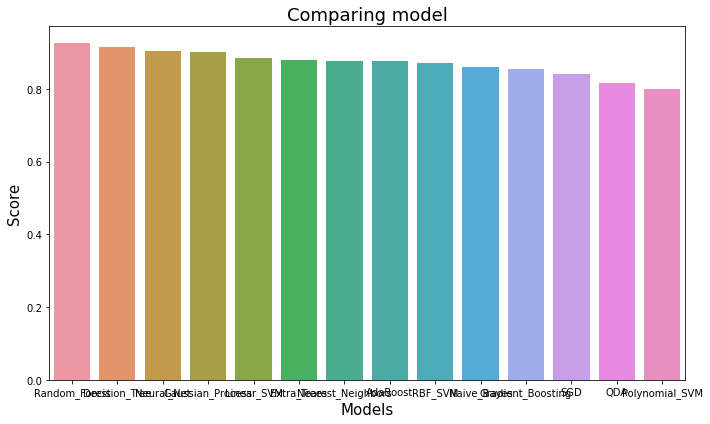

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='name', 
            y="score", 
            data=df, 
            order=df.sort_values('score',ascending = False).name)
# set labels
plt.xlabel("Models", size=15)
plt.ylabel("Score", size=15)
plt.title("Comparing model", size=18)
plt.tight_layout()